In [8]:
#!pip install pandas
#!pip install matplotlib
#!pip install numpy
#!pip install librosa
!pip install tensorflow tensorflow_hub

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 7.8 MB/s eta 0:00:00


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
from PIL import Image
import PIL.Image
import soundfile
import os

from glob import glob

import librosa
import IPython.display as ipd

import tensorflow as tf
import tensorflow_hub as hub
import requests
from io import BytesIO

## Read Audio Files


In [10]:
audio_files = glob('Desktop/Audio/short-monster-scream-105026.mp3')
#/Desktop/Audio/startup-87026.mp3


#Playing an audio file using IPython.display
ipd.Audio(audio_files[0])

## Convert to Spectrogram

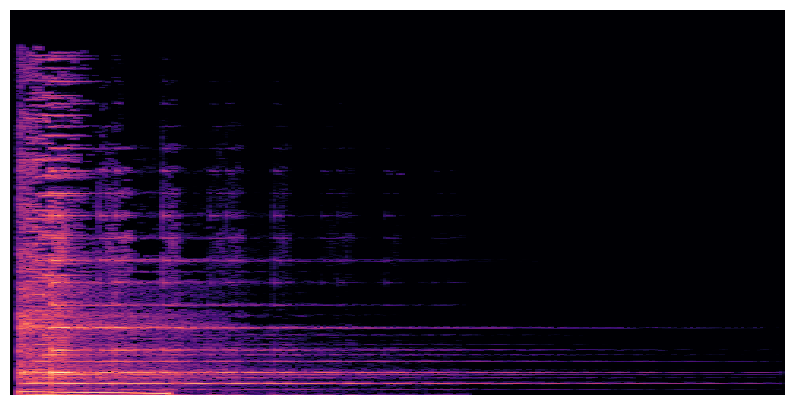

In [ ]:
# Function to convert audio to spectrogram
def audio_to_spectrogram(file_path, save_image=True):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)

    # Convert amplitude to decibels (log scale)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Plot the spectrogram without labels
    plt.figure(figsize=(10, 5))
    plt.axis('off')  # Remove axis
    librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None)

    # Save the spectrogram as an image
    if save_image:
        plt.savefig(file_path.replace(".mp3", "_spectrogram.png"), bbox_inches='tight', pad_inches=0)

    # Show the spectrogram
    plt.show()

# Convert the audio file to a spectrogram
for file in audio_files:
    audio_to_spectrogram(file)


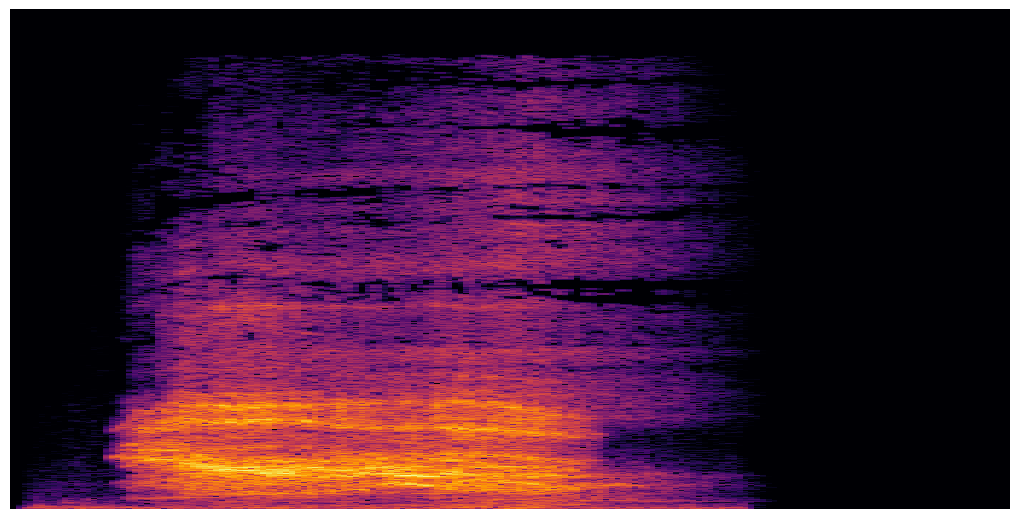

Spectrogram saved as RGB image: Desktop/Audio/short-monster-scream-105026_spectrogram.png


<Figure size 640x480 with 0 Axes>

In [11]:
def audio_to_spectrogram(file_path, save_image=True):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)

    # Convert amplitude to decibels (log scale)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Create a figure without axis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_axis_off()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Display spectrogram
    librosa.display.specshow(S_db, sr=sr, cmap='inferno')

    # Show the spectrogram before saving
    plt.show()

    # Save spectrogram as a high-quality PNG image
    img_path = file_path.replace(".mp3", "_spectrogram.png")
    if save_image:
        plt.savefig(img_path, dpi=300, bbox_inches='tight', pad_inches=0)

    plt.close(fig)  # Close plot to free memory

    # Convert to RGB format using PIL
    img = Image.open(img_path).convert("RGB")
    img.save(img_path)  # Overwrite with RGB format

    print(f"Spectrogram saved as RGB image: {img_path}")

# Convert the audio files to spectrogram images
for file in audio_files:
    audio_to_spectrogram(file)


## Spectrogram

In [12]:
def load_image(image_path, image_size=(256, 256)):
    # Load image from path and resize
    img = PIL.Image.open(image_path)
    img = img.resize(image_size)
    img = np.array(img) / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def show_image(image, title=''):
    # Remove batch dimension and display image
    image = np.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [17]:
content_image_path = 'Desktop/Audio/short-monster-scream-105026_spectrogram.png'
style_image_path = 'Desktop/Paintings/StarrtNight.jpg'

content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

In [18]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [21]:
content_image = tf.constant(content_image, dtype=tf.float32)
style_image = tf.constant(style_image, dtype=tf.float32)

stylized_image = hub_model(content_image, style_image)[0]

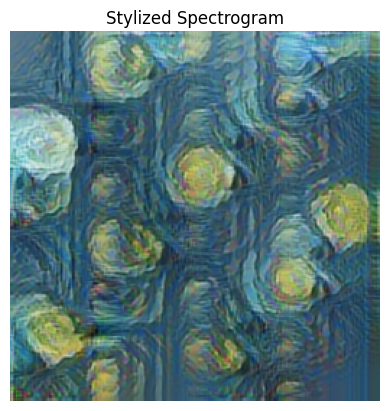

In [22]:
show_image(stylized_image, title='Stylized Spectrogram')